<a href="https://colab.research.google.com/github/Shreya200326/Shreya200326/blob/main/gdscproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
val=pd.read_csv("/content/twitter_validation.csv", header=None)
train=pd.read_csv("/content/twitter_training.csv", header=None)


In [ ]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
train_data=train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
15832,3108,Dota2,Negative,She wtf
15833,3108,Dota2,Negative,wtf
15834,3109,Dota2,Irrelevant,ICYMI: @BLASTDota finds sponsor in @KITKAT. . ...
15835,3109,Dota2,Irrelevant,ICYMI: @ BLASTDota finds sponsor in @ KITKAT. ...


In [ ]:
val_data=val
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
train_data["lower"]=train_data.text.str.lower()
train_data["lower"]=[str(data) for data in train_data.lower]
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))["lower"]=val_data.text.str.lower()
val_data["lower"]=[str(data) for data in val_data.lower]
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

In [ ]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


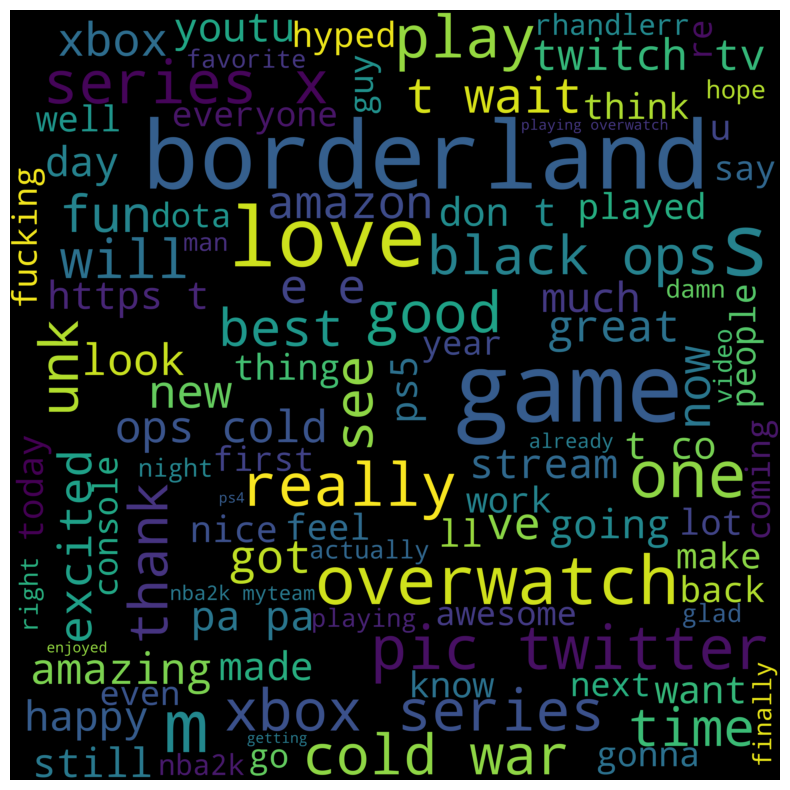

In [ ]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

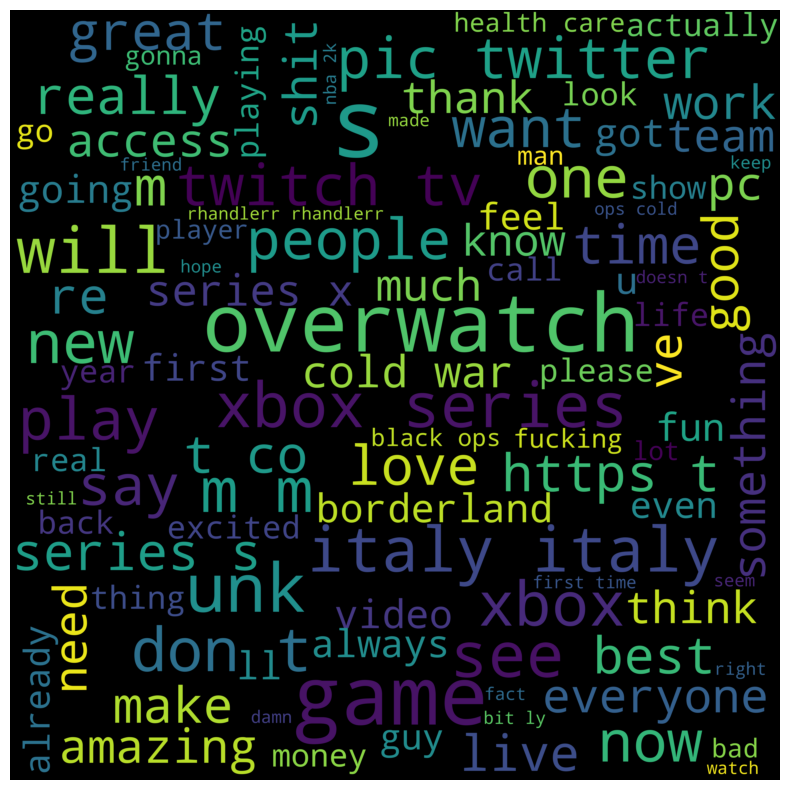

In [101]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
plot1=train.groupby(by=["information","type"]).count().reset_index()
plot1.head()

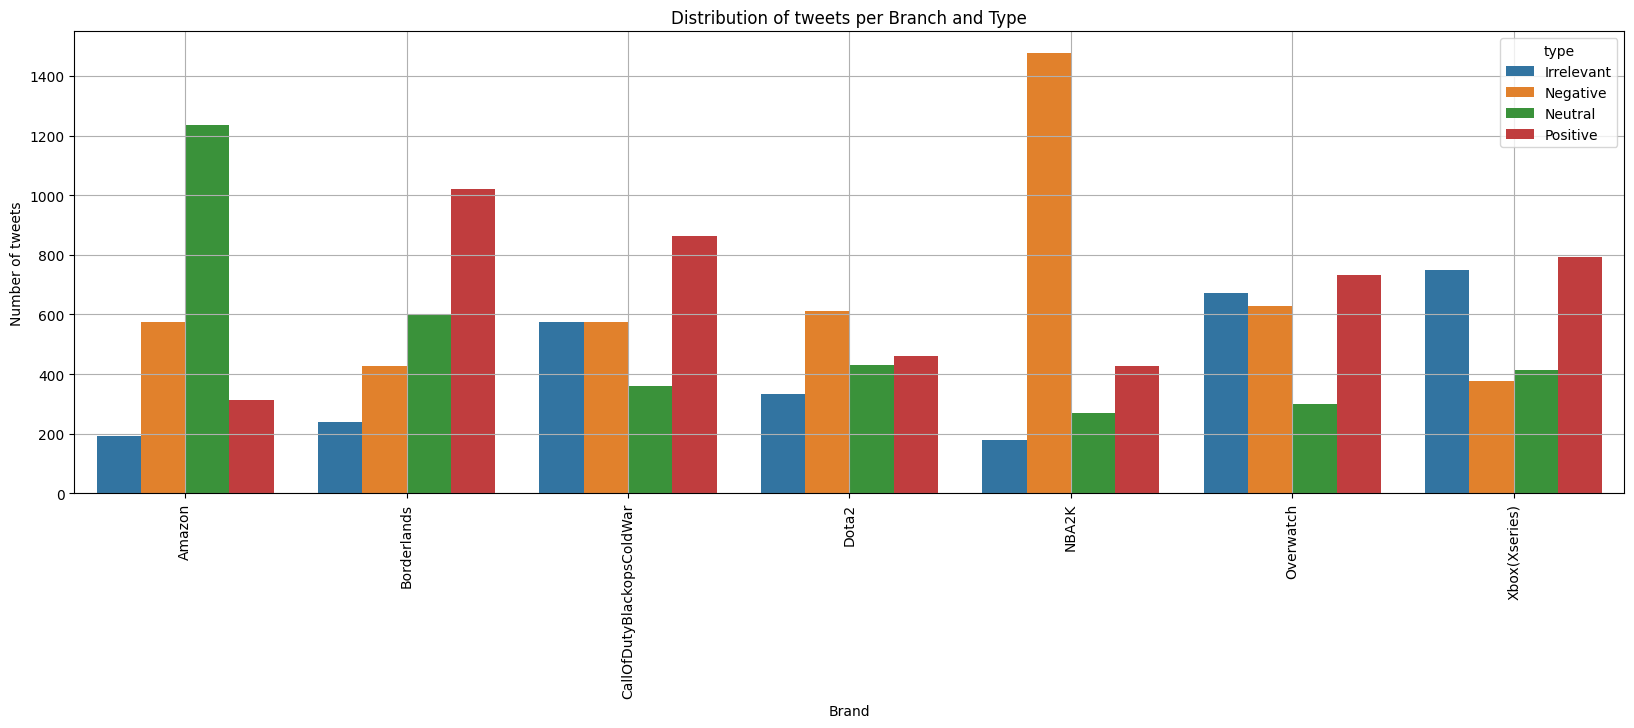

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [ ]:
nltk.download('punkt')

In [65]:
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  11135


In [ ]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [ ]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [66]:
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words,
    ngram_range=(1, 1)
)

In [ ]:
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [ ]:
vectorizer = CountVectorizer()
X_train = ["This is the first document.", "This is the second document."]

In [ ]:
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_test = ["This is a test sentence."]

In [ ]:
X_test_bow = vectorizer.transform(X_test)

In [ ]:
label_encoder = LabelEncoder()
y_train_bow = label_encoder.fit_transform(reviews_train['type'])
print(y_train_bow)

[0 1 3 ... 2 0 2]


In [ ]:
print(X_test_bow.toarray())

[[0 0 1 0 0 1]]


In [ ]:
X_test_bow = vectorizer.transform(X_test)

In [ ]:
X_train_bow = vectorizer.transform(X_train)

In [ ]:
X_test_bow

<1x6 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
label_encoder = LabelEncoder()
y_test_bow = label_encoder.fit_transform(reviews_test['type'])

In [ ]:
y_test_bow = pd.Series(y_test_bow)


In [ ]:
y_test_bow.value_counts() / y_test_bow.shape[0]

1    0.298295
3    0.296402
2    0.222538
0    0.182765
Name: count, dtype: float64

In [ ]:
print("X_train_bow shape:", X_train_bow.shape)
print("y_train_bow shape:", y_train_bow.shape)

X_train_bow shape: (2, 6)
y_train_bow shape: (12669,)


In [ ]:
print("X_test_bow number of samples:", X_test_bow.shape[0])

X_test_bow number of samples: 1


In [ ]:
print(globals())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import sys

In [ ]:
if 'X_train_bow' not in globals():
    raise ValueError('Variable X_train_bow is not defined')
if 'y_train_bow' not in globals():
    raise ValueError('Variable y_train_bow is not defined')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()

In [105]:
bow_counts.fit(X_train)
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_val_bow

<1000x4 sparse matrix of type '<class 'numpy.int64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [104]:
print(len(y_train_bow))
print(len(globals()['y_val_bow']))

print(X_train_bow.shape)
print(X_val_bow.shape)

12669
0
(2, 6)
(1000, 4)


In [72]:
le.fit(y_val_bow.unique())

LabelEncoder()

In [73]:
y_val_bow = y_val_bow[y_val_bow != "Irrelevant"]
y_val_bow_num = le.transform(y_val_bow)

In [71]:
le.fit(np.unique(y_val_bow))
y_val_bow_num = le.transform(y_val_bow)

In [75]:
print(y_val_bow_num)

[1 0 0 1 0 2 2 2 0 2 2 0 1 0 2 2 0 2 0 0 1 0 1 1 0 0 2 2 0 2 0 1 1 2 1 2 1
 1 1 2 1 0 0 0 1 2 0 0 2 2 2 2 2 0 0 2 2 0 1 0 1 0 2 0 0 2 2 2 1 1 1 2 2 1
 2 1 0 0 1 1 0 2 0 0 0 1 2 1 0 2 2 1 2 1 2 0 1 1 1 0 1 0 1 1 2 2 1 0 0 2 0
 1 0 2 1 0 1 2 1 2 2 1 1 1 1 2 1 2 2 0 1 1 1 1 0 1 2 0 1 0 1 0 0 0 2 2 2 1
 1 2 1 1 1 2 1 0 0 1 2 2 1 2 2 1 1 0 0 0 0 2 1 1 2 2 2 2 0 2 2 1 0 0 0 2 2
 0 0 2 2 0 2 2 0 2 1 0 1 1 2 0 2 2 1 2 0 0 2 2 2 2 1 1 2 0 1 2 1 0 1 1 0 2
 2 0 1 2 1 0 1 0 2 2 0 0 0 2 0 1 2 1 1 0 2 0 2 0 1 1 2 0 1 0 2 0 2 2 2 2 2
 2 0 0 2 0 1 1 1 2 1 2 0 1 1 1 1 0 2 0 0 2 2 1 1 0 0 0 1 2 1 0 2 1 0 0 0 2
 1 1 0 2 2 1 2 1 1 2 2 0 1 2 0 1 0 0 2 2 2 2 1 0 1 2 1 2 0 0 0 2 1 2 0 1 0
 2 2 2 2 1 1 1 0 2 2 1 0 2 1 0 0 0 0 0 1 1 1 2 2 0 0 1 0 1 1 0 2 0 2 2 2 1
 2 1 1 0 2 1 1 1 1 1 1 1 1 0 0 2 2 1 0 0 2 2 0 2 2 2 2 2 1 0 2 1 1 2 2 2 2
 1 0 0 0 0 1 2 0 0 2 2 1 1 0 0 2 1 0 0 0 1 1 2 0 0 0 1 1 1 0 0 2 0 1 0 1 2
 0 1 2 2 0 1 1 2 0 0 1 1 0 2 0 1 0 0 0 2 0 2 0 2 0 0 1 0 1 0 2 0 1 0 0 1 1
 2 0 2 1 1 1 1 0 1 1 1 0 

In [102]:
y_val_bow = y_val_bow.replace("Neutral", 4)

In [103]:
y_val_bow_num = le.transform(np.array(y_val_bow))

In [82]:
non_numerical_values = y_val_bow[~y_val_bow.isin(['0', '1', '2', '3', '4'])]
print(f"Non-numerical values: {non_numerical_values.value_counts()}")

Non-numerical values: type
4           285
Positive    277
Negative    266
Name: count, dtype: int64


In [83]:
y_val_bow = y_val_bow[y_val_bow.isin(['0', '1', '2', '3', '4'])]

In [84]:
y_val_bow = y_val_bow.replace(to_replace=non_numerical_values.index, value='0')

In [86]:
y_val_bow_num = le.transform(np.array(y_val_bow))

In [97]:
!pip install xgboost
from sklearn.metrics import accuracy_score

In [92]:
from xgboost import XGBClassifier

In [87]:
le = LabelEncoder()
y_train_bow_num = le.fit_transform(y_train_bow)
y_test_bow_num=le.transform(y_test_bow)
y_val_bow_num=le.transform(y_val_bow)

In [89]:
y_train_bow_num = y_train_bow_num.reshape(-1, 1)

In [94]:
y_train_bow_num = y_train_bow_num.ravel()

In [99]:
XGB=XGBClassifier(objective="multi:softmax",n_estimators=1000,colsample_bytree=0.6, subsample=0.6)
XGB.fit(X_train_bow, y_train_bow_num)
# Prediction
test_pred_2 = XGB.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow_num, test_pred_2) * 100)